In [2]:
import numpy as np
import matplotlib.pyplot as plt

Distance to Destination: 3983.1 meters
Current Lane: 3
Lane Speeds: [17.2 19.3 16.9 19.9 15.7]
State History: [(4000, 3, 17.2, 19.3, 16.9, 19.9, 15.7), (3983.1, 3, 17.2, 19.3, 16.9, 19.9, 15.7)]
Reward: 1.9

Distance to Destination: 3963.2 meters
Current Lane: 4
Lane Speeds: [17.2 19.3 16.9 19.9 15.7]
State History: [(4000, 3, 17.2, 19.3, 16.9, 19.9, 15.7), (3983.1, 3, 17.2, 19.3, 16.9, 19.9, 15.7), (3963.2, 4, 17.2, 19.3, 16.9, 19.9, 15.7)]
Reward: 4.9

Speed reduced on lane 1 by factor 0.57 due to an obstacle or collision.
Distance to Destination: 3943.3 meters
Current Lane: 4
Lane Speeds: [ 9.7 19.3 16.9 19.9 15.7]
State History: [(3983.1, 3, 17.2, 19.3, 16.9, 19.9, 15.7), (3963.2, 4, 17.2, 19.3, 16.9, 19.9, 15.7), (3943.3, 4, 9.7, 19.3, 16.9, 19.9, 15.7)]
Reward: 9.9

Distance to Destination: 3923.4 meters
Current Lane: 4
Lane Speeds: [ 9.7 19.3 16.9 19.9 15.7]
State History: [(3963.2, 4, 17.2, 19.3, 16.9, 19.9, 15.7), (3943.3, 4, 9.7, 19.3, 16.9, 19.9, 15.7), (3923.4, 4, 9.7, 19.3

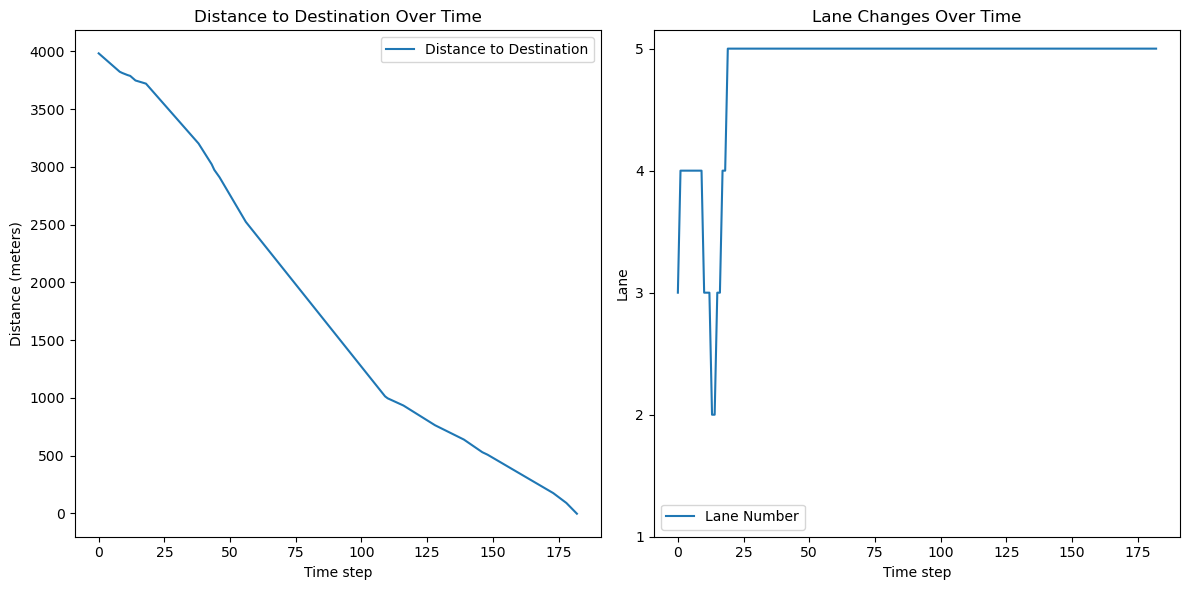

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


class Env:
    def __init__(self, num_lanes=5, init_distance=4000):
        self.num_lanes = num_lanes
        self.distance_to_destination = init_distance
        self.current_lane = np.random.randint(1, num_lanes + 1)
        self.lane_speeds = np.random.uniform(15, 20, size=num_lanes).round(1)
        self.history = []

    def reset(self):
        self.distance_to_destination = 4000
        self.current_lane = np.random.randint(1, self.num_lanes + 1)
        self.lane_speeds = np.random.uniform(15, 20, size=self.num_lanes).round(1)
        self.history = []
        self.update_history()
        return self.get_state()

    def step(self, action):
        stress_penalty = -5 if abs(action) > 0 else 0  # Penalty for attempting to change lanes
        successful_change = random.random() < 0.5  # 50% success rate for changing lanes

        if successful_change and abs(action) > 0:
            new_lane = self.current_lane + action
            if new_lane > 0 and new_lane <= self.num_lanes:
                self.current_lane = new_lane
        
        # Apply random events
        for i in range(self.num_lanes):
            # Check for a decrease in speed due to an obstacle or collision
            if random.random() < 0.05:  # 5% chance for speed decrease
                decrease_factor = np.random.uniform(0.5, 0.8)  # 20% to 50% decrease
                self.lane_speeds[i] *= decrease_factor
                print(f"Speed reduced on lane {i+1} by factor {decrease_factor:.2f} due to an obstacle or collision.")
    
            # Check for an increase in speed due to emergency vehicles
            elif random.random() < 0.05:  # 5% chance for speed increase
                increase_factor = np.random.uniform(1.2, 1.4)  # 20% to 40% increase
                self.lane_speeds[i] *= increase_factor
                print(f"Speed increased on lane {i+1} by factor {increase_factor:.2f} due to emergency vehicles making way.")

        
        self.lane_speeds = np.round(self.lane_speeds, 1)

        speed = self.lane_speeds[self.current_lane - 1]
        distance_covered = speed
        self.distance_to_destination -= distance_covered
        self.update_history()

        reward = distance_covered - 10 + stress_penalty  # Calculate reward 
        done = self.distance_to_destination <= 0
        next_state = self.get_state()

        return next_state, reward, done

    def update_history(self):
        rounded_distance = round(self.distance_to_destination, 1)
        current_state = (rounded_distance, self.current_lane, *self.lane_speeds)
        self.history.append(current_state)
        if len(self.history) > 3:
            self.history.pop(0)


    def get_state(self):
        if len(self.history) < 3:
            return np.zeros((3, 7))
        return np.array(self.history).flatten()

    def render(self):
        print(f"Distance to Destination: {self.distance_to_destination:.1f} meters")
        print(f"Current Lane: {self.current_lane}")
        print(f"Lane Speeds: {self.lane_speeds}")
        print(f"State History: {self.history}")

def simple_decision_policy(env):
    current_speed = env.lane_speeds[env.current_lane - 1]
    best_lane = np.argmax(env.lane_speeds) + 1
    if best_lane < env.current_lane:
        return -1  # Move left
    elif best_lane > env.current_lane:
        return 1   # Move right
    return 0  # Stay in current lane

env = Env()
state = env.reset()
done = False
distances = []
lanes = []

while not done:
    action = simple_decision_policy(env)
    state, reward, done = env.step(action)
    env.render()
    print(f"Reward: {reward:.1f}\n")
    distances.append(round(env.distance_to_destination, 1)) 
    lanes.append(env.current_lane)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(distances, label='Distance to Destination')
plt.xlabel('Time step')
plt.ylabel('Distance (meters)')
plt.title('Distance to Destination Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lanes, label='Lane Number')
plt.xlabel('Time step')
plt.ylabel('Lane')
plt.title('Lane Changes Over Time')
plt.yticks(range(1, env.num_lanes + 1))
plt.legend()

plt.tight_layout()
plt.show()


Distance to Destination: 3252.5 meters
Current Lane: 1
Lane Speeds: [19.5 16.8 17.8 17.9 15.3]
State History: [(3272, 1, 19.9, 16.4, 17.7, 18.3, 15.0), (3252.5, 1, 19.5, 16.8, 17.8, 17.9, 15.3)]
Reward: 9.5

Distance to Destination: 3239.2 meters
Current Lane: 1
Lane Speeds: [13.3 16.9 17.8 17.6 15.5]
State History: [(3272, 1, 19.9, 16.4, 17.7, 18.3, 15.0), (3252.5, 1, 19.5, 16.8, 17.8, 17.9, 15.3), (3239.2, 1, 13.3, 16.9, 17.8, 17.6, 15.5)]
Reward: 3.3

Distance to Destination: 3222.3 meters
Current Lane: 2
Lane Speeds: [10.7 16.9 17.3 17.5 15.7]
State History: [(3252.5, 1, 19.5, 16.8, 17.8, 17.9, 15.3), (3239.2, 1, 13.3, 16.9, 17.8, 17.6, 15.5), (3222.3, 2, 10.7, 16.9, 17.3, 17.5, 15.7)]
Reward: 1.9

Distance to Destination: 3205.2 meters
Current Lane: 2
Lane Speeds: [10.9 17.1 17.3 17.1 15.7]
State History: [(3239.2, 1, 13.3, 16.9, 17.8, 17.6, 15.5), (3222.3, 2, 10.7, 16.9, 17.3, 17.5, 15.7), (3205.2, 2, 10.9, 17.1, 17.3, 17.1, 15.7)]
Reward: 2.1

Distance to Destination: 3188.4 met

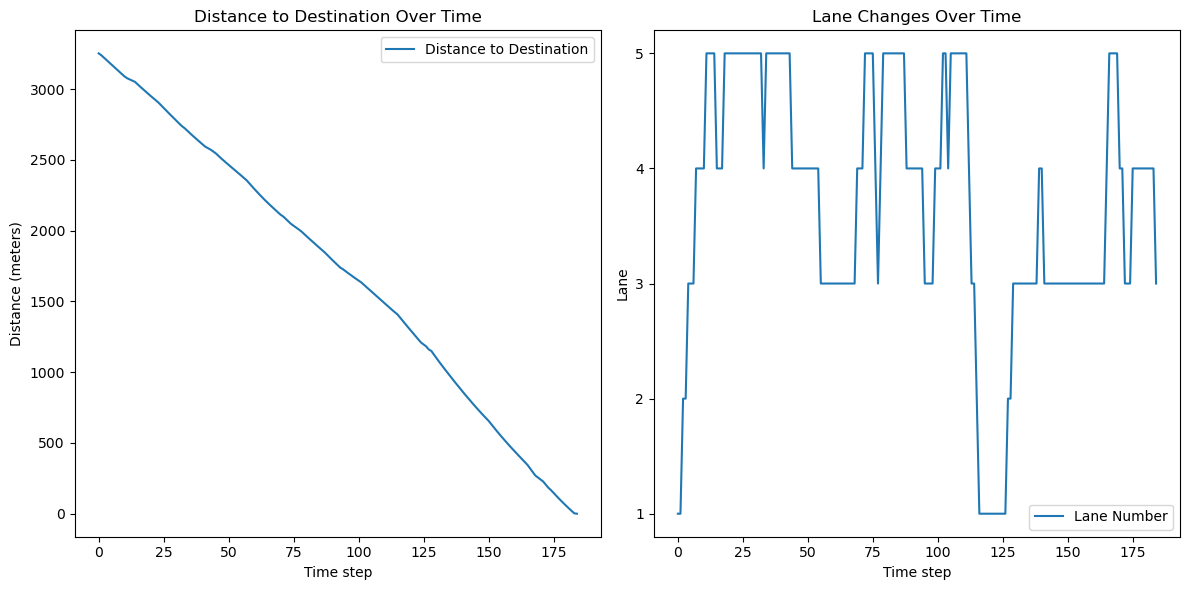

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Env:
    def __init__(self, num_lanes=5, init_distance=4000):
        self.num_lanes = num_lanes
        self.distance_to_destination = init_distance
        self.current_lane = np.random.randint(1, num_lanes + 1)
        self.lane_speeds = np.random.uniform(15, 20, size=num_lanes).round(1)
        self.history = []

    def reset(self):
        self.distance_to_destination = np.random.randint(3000, 5001)
        self.current_lane = np.random.randint(1, self.num_lanes + 1)
        self.lane_speeds = np.random.uniform(15, 20, size=self.num_lanes).round(1)
        self.history = []
        self.update_history()
        return self.get_state()

    def adjust_lane_speeds(self):
        # Applying adjustments based on neighboring lane speeds
        new_speeds = self.lane_speeds.copy()
        for i in range(self.num_lanes):
            left_neighbor = i - 1 if i > 0 else None
            right_neighbor = i + 1 if i < self.num_lanes - 1 else None
            if left_neighbor is not None:
                new_speeds[i] += 0.2 * np.sign(self.lane_speeds[left_neighbor] - self.lane_speeds[i])
            if right_neighbor is not None:
                new_speeds[i] += 0.2 * np.sign(self.lane_speeds[right_neighbor] - self.lane_speeds[i])
        self.lane_speeds = new_speeds

    def step(self, action):
        stress_penalty = -5 if abs(action) > 0 else 0  # Penalty for attempting to change lanes
        successful_change = random.random() < 0.5  # 50% success rate for changing lanes

        if successful_change and abs(action) > 0:
            new_lane = self.current_lane + action
            if new_lane > 0 and new_lane <= self.num_lanes:
                self.current_lane = new_lane
        
        # Apply random events
        for i in range(self.num_lanes):
            # Random events affecting speed
            if random.random() < 0.05:
                self.lane_speeds[i] *= np.random.uniform(0.5, 0.8)
            elif random.random() < 0.05:
                self.lane_speeds[i] *= np.random.uniform(1.2, 1.4)

        self.adjust_lane_speeds()
        self.lane_speeds += np.random.normal(0, 0.1, self.num_lanes)  # Adding noise
        self.lane_speeds = np.round(self.lane_speeds, 1)

        speed = self.lane_speeds[self.current_lane - 1]
        distance_covered = speed
        self.distance_to_destination -= distance_covered
        self.distance_to_destination = max(self.distance_to_destination, 0)  # Prevent negative distance
        self.update_history()

        reward = distance_covered - 10 + stress_penalty  # Calculate reward 
        done = self.distance_to_destination <= 0
        next_state = self.get_state()

        return next_state, reward, done

    def update_history(self):
        # Updates the history maintaining only the last 3 timesteps
        rounded_distance = round(self.distance_to_destination, 1)
        current_state = (rounded_distance, self.current_lane, *self.lane_speeds)
        self.history.append(current_state)
        if len(self.history) > 3:
            self.history.pop(0)

    def get_state(self):
        # Ensure that the state has the structure required by the problem statement
        if len(self.history) < 3:
            return np.zeros((3, 7))
        return np.array(self.history).flatten()

    def render(self):
        print(f"Distance to Destination: {self.distance_to_destination:.1f} meters")
        print(f"Current Lane: {self.current_lane}")
        print(f"Lane Speeds: {self.lane_speeds}")
        print(f"State History: {self.history}")
        if self.distance_to_destination == 0:
            print("Ah Tan has arrived at the destination.")

def simple_decision_policy(env):
    current_speed = env.lane_speeds[env.current_lane - 1]
    best_lane = np.argmax(env.lane_speeds) + 1
    if best_lane < env.current_lane:
        return -1  # Move left
    elif best_lane > env.current_lane:
        return 1   # Move right
    return 0  # Stay in current lane

env = Env()
state = env.reset()
done = False
distances = []
lanes = []

while not done:
    action = simple_decision_policy(env)
    state, reward, done = env.step(action)
    env.render()
    print(f"Reward: {reward:.1f}\n")
    distances.append(round(env.distance_to_destination, 1))
    lanes.append(env.current_lane)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(distances, label='Distance to Destination')
plt.xlabel('Time step')
plt.ylabel('Distance (meters)')
plt.title('Distance to Destination Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lanes, label='Lane Number')
plt.xlabel('Time step')
plt.ylabel('Lane')
plt.title('Lane Changes Over Time')
plt.yticks(range(1, env.num_lanes + 1))
plt.legend()

plt.tight_layout()
plt.show()

